# LLoyd's Algorithm


Lloyd's algorithm, also known as the k-means clustering algorithm, is a popular unsupervised machine learning technique used in data science. 

Lloyd's algorithm is used to partition a dataset into clusters or groups based on similarity. It does this by iteratively updating the centroids of these clusters until convergence. Here's a simplified overview of how it works:

- Choose the number of clusters (k) that you want to create.
- Initialize k centroids randomly within the data space.
- Assign each data point to the nearest centroid, forming k clusters.
- Recalculate the centroids as the mean of all data points in each cluster.
- Repeat steps 3 and 4 until the centroids no longer change significantly or a set number of iterations is reached.




In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [71]:
# Creating a pseudo dataset to work with K-means
np.random.seed(42)

N = 2000
data1 = np.random.randn(N//3,2) + np.array([2,2])
data2 = np.random.randn(N//3,2) + np.array([-5,-5])
data3 = np.random.randn(N//3,2) + np.array([6,-2])
X = np.concatenate((data1, data2, data3))


In [72]:
X.shape

(1998, 2)

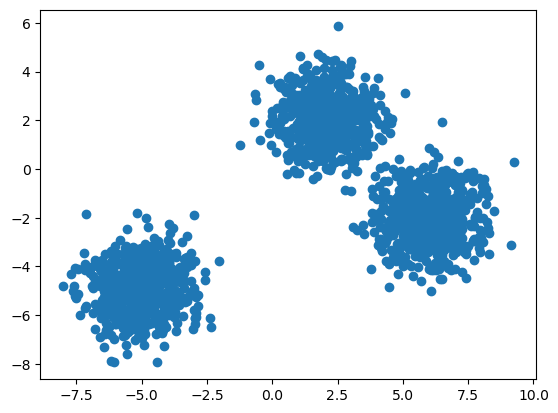

In [95]:
plt.scatter(X[:,0], X[:,1])

In [110]:
# We first have to go with the choice of k
# Usually there are different methods to select K. 
# Here, we will just go with a choice of K according to the above plot
k = 3

# ----------------------------
# STEP 1: Initialization
# ----------------------------
# For each point, we need to initialize cluster indicators

cluster_indicators = {}
for i in range(X.shape[0]):
    cluster_indicators["z_{i}".format(i=i)] = np.random.randint(1,4)
    

In [111]:
print(cluster_indicators["z_100"])
print(cluster_indicators["z_160"])
print(cluster_indicators["z_1000"])

3
2
2


In [112]:
# ----------------------------
# Indicator function: returns 1 if there is a match(defined in the function), else 0
# ----------------------------
def indicator(Z_i, k):
    if cluster_indicators[Z_i] == k:
        return 1
    else:
        return 0
        
# ----------------------------
# Euclidean squared distance
# ----------------------------
def distance(x, mu):
    return sum((x-mu)**2)
        

# ----------------------------
# Function to find calculate the mean and to perform re-assignment of the clusters 
# in the cluster indicator. Iters once.
# ----------------------------
def cluster_center(mu_1=0, mu_2=0, mu_3=0, add1=0, add2=0, add3=0):
    
    # ----------------------------
    # Computing Mean
    # ----------------------------
        
    for i in range(X.shape[0]):
        add1 += indicator("z_{i}".format(i=i), 1)
        mu_1 += X[i]*indicator("z_{i}".format(i=i), 1)


    for i in range(X.shape[0]):    
        add2 += indicator("z_{i}".format(i=i), 2)
        mu_2 += X[i]*indicator("z_{i}".format(i=i), 2)


    for i in range(X.shape[0]):
        add3 += indicator("z_{i}".format(i=i), 3)
        mu_3 += X[i]*indicator("z_{i}".format(i=i), 3)

    
    mu_1 = mu_1/add1
    mu_2 = mu_2/add2
    mu_3 = mu_3/add3

    
    # ----------------------------
    # Reassignment step
    # ----------------------------

    for i in range(X.shape[0]):
        dist = [distance(X[i], mu_1), distance(X[i], mu_2), distance(X[i], mu_3)]
        cluster_indicators["z_{i}".format(i=i)] = np.argmin(dist)+1

        
    return mu_1, mu_2, mu_3

    


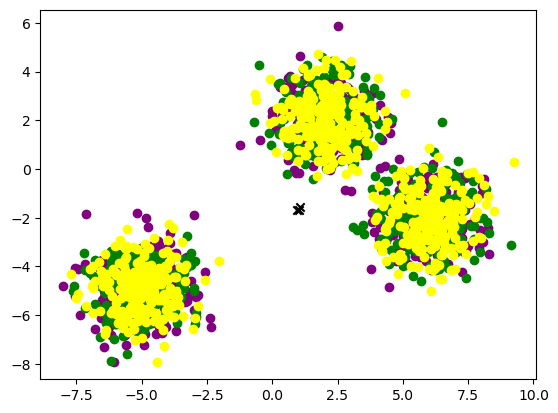

None


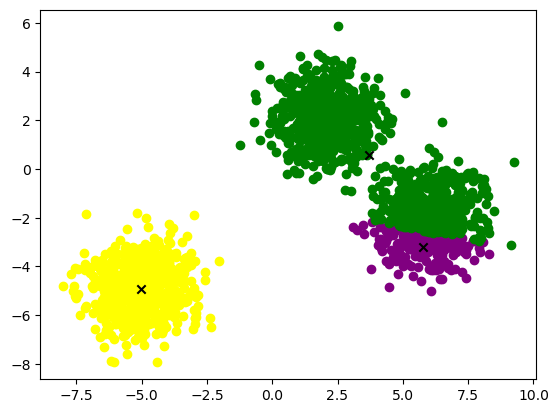

None


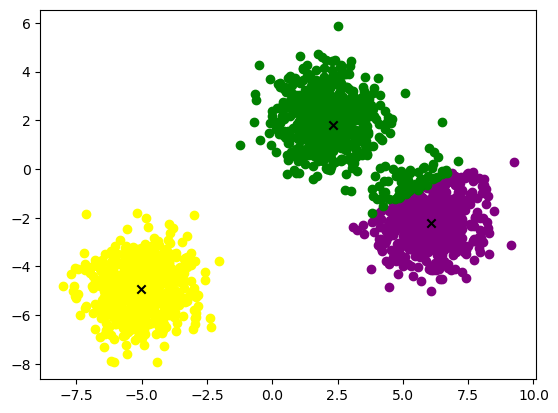

None


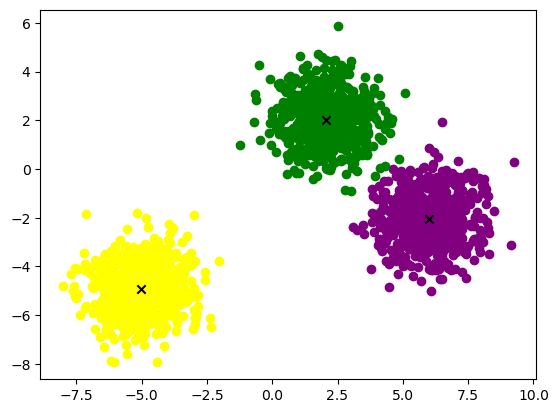

None


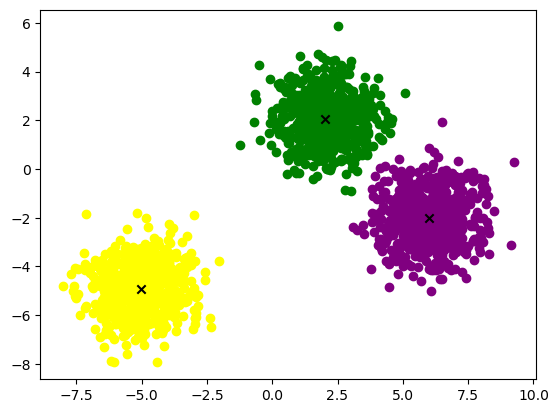

None
mu 1 equals:  [ 6.00405932 -2.02328677]
mu 2 equals:  [2.0348325  2.03907804]
mu 3 equals:  [-5.01061265 -4.9272979 ]


In [113]:
convergence = False

# ----------------------------
# repeating the mean computation and cluster re-assignment until convergence.
# This loop also prints the scatter plot after each iteration.
# ----------------------------

mu_1, mu_2, mu_3 = np.array([-5,-7]), np.array([5,-8]), np.array([2.5,6])
while not convergence:
    
    color_coded = {1: [],
              2: [],
              3: []}

    for i in range(X.shape[0]):
        if cluster_indicators["z_{i}".format(i=i)] == 1:
            color_coded[1].append(X[i])
        elif cluster_indicators["z_{i}".format(i=i)] == 2:
            color_coded[2].append(X[i])
        else:
            color_coded[3].append(X[i])

#     print(mu_1, mu_2, mu_3)
    mu_1, mu_2, mu_3 = cluster_center()
    
    plt.scatter(np.array(color_coded[1])[:,0], np.array(color_coded[1])[:,1], color="purple")
    plt.scatter(np.array(color_coded[2])[:,0], np.array(color_coded[2])[:,1], color="green")
    plt.scatter(np.array(color_coded[3])[:,0], np.array(color_coded[3])[:,1], color="yellow")

    plt.scatter(mu_1[0], mu_1[1], marker='x', color="black")
    plt.scatter(mu_2[0], mu_2[1], marker='x', color="black")
    plt.scatter(mu_3[0], mu_3[1], marker='x', color="black")
    print(plt.show())
    
    # Condition to check if the updated weight differs or not under a given threshold(0.1 here)
    if (np.abs(mu_1_old-mu_1)<0.1).all() and (np.abs(mu_2_old-mu_2)<0.1).all() and (np.abs(mu_3_old-mu_3)<0.1).all():
        print("mu 1 equals: ", mu_1)
        print("mu 2 equals: ", mu_2)
        print("mu 3 equals: ", mu_3)
        convergence = True
    else:
        mu_1_old, mu_2_old, mu_3_old = mu_1, mu_2, mu_3


        
    

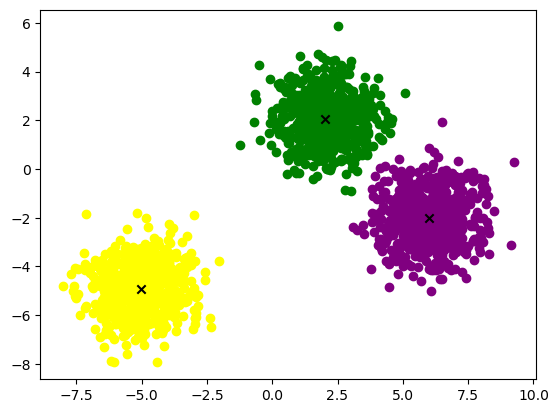

In [114]:
# ----------------------------
# Final output in form of a scatter plot
# ----------------------------
plt.scatter(np.array(color_coded[1])[:,0], np.array(color_coded[1])[:,1], color="purple")
plt.scatter(np.array(color_coded[2])[:,0], np.array(color_coded[2])[:,1], color="green")
plt.scatter(np.array(color_coded[3])[:,0], np.array(color_coded[3])[:,1], color="yellow")
plt.scatter(mu_1[0], mu_1[1], marker='x', color="k")
plt.scatter(mu_2[0], mu_2[1], marker='x', color="k")
plt.scatter(mu_3[0], mu_3[1], marker='x', color="k")
plt.show()